In [1]:

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style="seaborn"
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load DataFrames from CSV
X_train_pca_df = pd.read_csv("X_train_pca.csv")
X_val_pca_df = pd.read_csv("X_val.csv")
X_test_pca_df = pd.read_csv("X_test.csv")
Y_train = pd.read_csv("Y_train.csv")
Y_val = pd.read_csv("Y_val.csv")
Y_test = pd.read_csv("Y_test.csv")

In [3]:
import numpy as np

class GaussianNaiveBayes:
    def __init__(self, alpha=1.0):
        self.alpha = alpha

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_priors = {}
        self.mean = {}
        self.variance = {}

        for c in self.classes:
            X_c = X[y == c]
            self.class_priors[c] = len(X_c) / len(X)
            self.mean[c] = np.mean(X_c, axis=0)
            self.variance[c] = np.var(X_c, axis=0) + self.alpha

            # Print progress
            # print(f"Class {c} - Prior: {self.class_priors[c]}, Mean: {self.mean[c]}, Variance: {self.variance[c]}")

    def _calculate_likelihood(self, x, mean, var):
        exponent = -0.5 * ((x - mean) ** 2 / var)
        return np.prod(1 / np.sqrt(2 * np.pi * var)) * np.exp(exponent)

    def predict_proba(self, X):
        predictions = []
        for x in X:
            class_scores = {}
            for c in self.classes:
                likelihood = self._calculate_likelihood(x, self.mean[c], self.variance[c])
                class_scores[c] = np.log(self.class_priors[c]) + np.sum(np.log(likelihood))
            predictions.append(class_scores)
        return predictions

    def predict(self, X):
        probabilities = self.predict_proba(X)
        return [max(p.keys(), key=lambda k: p[k]) for p in probabilities]


In [4]:

# Check for and handle missing values
X_train_pca_df.dropna(inplace=True)
Y_train.dropna(inplace=True)

# Convert DataFrame to NumPy array
X_train_array = X_train_pca_df.values
Y_train_array = Y_train.values.flatten()

# Initialize and fit the Gaussian Naive Bayes model
alpha = 0.3  # Adjust this parameter as needed
gnb_model = GaussianNaiveBayes(alpha)
gnb_model.fit(X_train_array, Y_train_array)



In [5]:
# Make predictions
predictions = gnb_model.predict(X_val_pca_df.values)




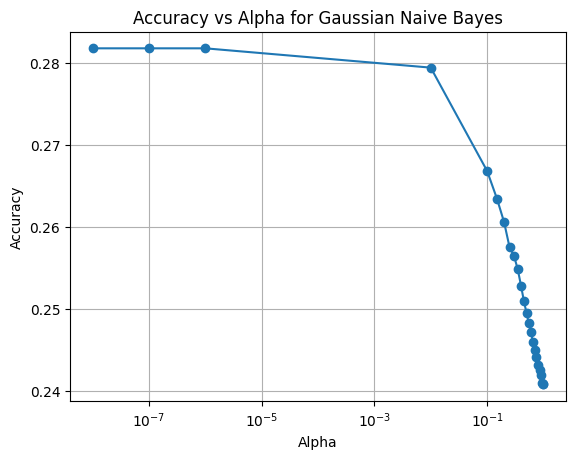

In [6]:
# Define the range of alpha values to test
alpha_values = [1e-8,1e-7,1e-6, 0.01] + [x / 100 for x in range(10, 105, 5)] + [1.0]

# Initialize lists to store alpha values and corresponding accuracies
alpha_list = []
accuracy_list = []

# Iterate over each alpha value
for alpha in alpha_values:
    # Initialize and fit the Gaussian Naive Bayes model
    model = GaussianNaiveBayes(alpha=alpha)
    model.fit(X_train_pca_df.values, Y_train.values.flatten())
    
    # Calculate accuracy on validation set
    predictions = model.predict(X_val_pca_df.values)
    accuracy = (predictions == Y_val.values.flatten()).mean()
    
    # Append alpha and accuracy to lists
    alpha_list.append(alpha)
    accuracy_list.append(accuracy)

# Plot the accuracy against alpha values
plt.plot(alpha_list, accuracy_list, marker='o')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Alpha for Gaussian Naive Bayes')
plt.xscale('log')  # Use logarithmic scale for alpha values
plt.grid(True)
plt.show()


In [7]:
#Therefore we apply variance smoothening by selecting alpha=1e-8

In [8]:
# Initialize and fit the Gaussian Naive Bayes model
alpha = 1e-8  # Adjust this parameter as needed
gnb_model = GaussianNaiveBayes(alpha)
gnb_model.fit(X_train_pca_df, Y_train)



In [9]:
gnb_predictions = gnb_model.predict(X_test_pca_df.values)

In [10]:
# Evaluate the model
accuracy = (gnb_predictions == Y_test.values.flatten()).mean()
print("Accuracy:", accuracy)

Accuracy: 0.765731793542305


In [11]:
from sklearn.metrics import f1_score

# Calculate F1 score
f1 = f1_score(Y_test, gnb_predictions, average='weighted')

# Print F1 score
print("F1 Score:", f1)


F1 Score: 0.6641384402613318


Text(0.5, 1.0, 'Confusion Matrix')

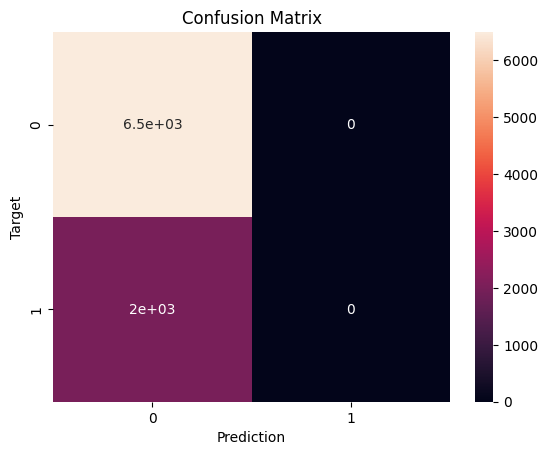

In [12]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(Y_test,gnb_predictions)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,gnb_predictions))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      6498
           1       0.00      0.00      0.00      1988

    accuracy                           0.77      8486
   macro avg       0.38      0.50      0.43      8486
weighted avg       0.59      0.77      0.66      8486

